In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Dec 23 15:45:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#DCGAN
Code from the paper "Unsupervised Representation Learning with Deep Convolutional Generative Adversarial Networks". 

#Dataset
I'll be using the CelebA dataset as the ground truth for the probability distribution. The GAN will be trained to generate faces.

In [2]:
!gdown --id 12rFbtWMg1NUCW4JKm_dwBpGdb6e-BuHg

Downloading...
From: https://drive.google.com/uc?id=12rFbtWMg1NUCW4JKm_dwBpGdb6e-BuHg
To: /content/CelebA.zip
100% 1.44G/1.44G [00:15<00:00, 91.5MB/s]


In [3]:
!unzip "/content/CelebA.zip" -d "/content/CelebA"

Streaming output truncated to the last 5000 lines.
 extracting: /content/CelebA/img_align_celeba/197600.jpg  
 extracting: /content/CelebA/img_align_celeba/197601.jpg  
 extracting: /content/CelebA/img_align_celeba/197602.jpg  
 extracting: /content/CelebA/img_align_celeba/197603.jpg  
 extracting: /content/CelebA/img_align_celeba/197604.jpg  
 extracting: /content/CelebA/img_align_celeba/197605.jpg  
 extracting: /content/CelebA/img_align_celeba/197606.jpg  
 extracting: /content/CelebA/img_align_celeba/197607.jpg  
 extracting: /content/CelebA/img_align_celeba/197608.jpg  
 extracting: /content/CelebA/img_align_celeba/197609.jpg  
 extracting: /content/CelebA/img_align_celeba/197610.jpg  
 extracting: /content/CelebA/img_align_celeba/197611.jpg  
 extracting: /content/CelebA/img_align_celeba/197612.jpg  
 extracting: /content/CelebA/img_align_celeba/197613.jpg  
 extracting: /content/CelebA/img_align_celeba/197614.jpg  
 extracting: /content/CelebA/img_align_celeba/197615.jpg  
 extr

In [4]:
!pip install tensorflow
!pip install tensorflow_datasets

In [5]:
!sudo du CelebA
!sudo ls CelebA/img_align_celeba | wc -l

1743716	CelebA/img_align_celeba
1743720	CelebA
202599


In [6]:
!pip install opencv-python

(218, 178, 3)


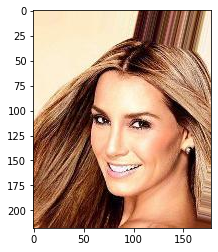

In [7]:
# Test image read

import cv2
import matplotlib.pyplot as plt

# Read in image as ndarray
img = cv2.imread('CelebA/img_align_celeba/000001.jpg')
# BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Starting images are 178px resolution
print(img.shape)

# print(img)
plt.imshow(img)

(178, 178, 3)


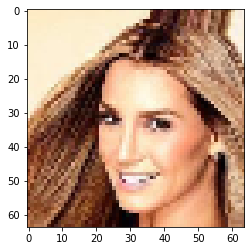

In [8]:

original_img = cv2.imread('CelebA/img_align_celeba/000001.jpg')

# Crop out top and bottom evenly to create a square image
crop_margin = int((original_img.shape[0] - original_img.shape[1]) / 2)
original_img = original_img[crop_margin:(original_img.shape[0] - crop_margin)]

print(original_img.shape)

# Resize to 64x64
img = cv2.resize(original_img, (64, 64))

# BGR -> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [9]:
!pip install tqdm

In [10]:
# I'm only going to take a subset of the data for now for training

SUBSET_AMOUNT = 10000
SUBSET_AMOUNT = 202599

In [11]:
import tensorflow as tf

# Load in all file names

directory = r'/content/CelebA/img_align_celeba'
list_ds = tf.data.Dataset.list_files(str(directory+'*/*'), shuffle=True)

In [12]:
import os

filenames_list = os.listdir(directory)

In [13]:
for i in filenames_list[:5]:
  print(i)

print("Number of files to read:", len(filenames_list))

026885.jpg
123631.jpg
125585.jpg
003685.jpg
006459.jpg
Number of files to read: 202599


In [14]:
def test_map_function(string):
  print(string + 'TEST')
  return string + 'TEST'

for i in map(test_map_function, filenames_list[:5]):
  print(i)

026885.jpgTEST
026885.jpgTEST
123631.jpgTEST
123631.jpgTEST
125585.jpgTEST
125585.jpgTEST
003685.jpgTEST
003685.jpgTEST
006459.jpgTEST
006459.jpgTEST


In [15]:
for i in list_ds.take(5):
  print(i.numpy())

b'/content/CelebA/img_align_celeba/055712.jpg'
b'/content/CelebA/img_align_celeba/017764.jpg'
b'/content/CelebA/img_align_celeba/130567.jpg'
b'/content/CelebA/img_align_celeba/055518.jpg'
b'/content/CelebA/img_align_celeba/134788.jpg'


In [16]:
def test_convert(string):
  print(string + 'WORKING')
  return string + 'WORKING'

for i in list_ds.take(5).map(test_convert, num_parallel_calls=tf.data.AUTOTUNE):
  print(i)

Tensor("add:0", shape=(), dtype=string)
tf.Tensor(b'/content/CelebA/img_align_celeba/146404.jpgWORKING', shape=(), dtype=string)
tf.Tensor(b'/content/CelebA/img_align_celeba/052581.jpgWORKING', shape=(), dtype=string)
tf.Tensor(b'/content/CelebA/img_align_celeba/075459.jpgWORKING', shape=(), dtype=string)
tf.Tensor(b'/content/CelebA/img_align_celeba/185123.jpgWORKING', shape=(), dtype=string)
tf.Tensor(b'/content/CelebA/img_align_celeba/174809.jpgWORKING', shape=(), dtype=string)


In [17]:
import numpy as np

np_filenames_list = np.array(filenames_list)

for i in map(test_map_function, np_filenames_list[:5]):
  print(i)

026885.jpgTEST
026885.jpgTEST
123631.jpgTEST
123631.jpgTEST
125585.jpgTEST
125585.jpgTEST
003685.jpgTEST
003685.jpgTEST
006459.jpgTEST
006459.jpgTEST


In [18]:
# Image getting and processing callback: 
# from image path, get processed 64x64 image
def img_path2data(img_path):

  # print(tf.strings.as_string(img_path))
  # print(tf.io.decode_raw(img_path, tf.uint8))
  # print(type(img_path))
  # if img_path.endswith('.jpg'):

  # Read in image as ndarray
  # print(img_path)
  img = cv2.imread(directory + '/' + img_path)
  # img = tf.io.read_file(img_path)
  # img = tf.io.decode_jpeg(img)

  # Crop out top and bottom evenly to create a square image
  crop_margin = int((img.shape[0] - img.shape[1]) / 2)
  img = img[crop_margin:(img.shape[0] - crop_margin)]

  # Resize to 64x64
  img = cv2.resize(img, (64, 64))

  # BGR -> RGB
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Normalize from [0, 255] to [-1, 1]
  img = (img / (255.0/2)) - 1.0

  return img

In [ ]:
map_test = map(img_path2data, filenames_list)

In [ ]:
print(type(map_test))

<class 'map'>


In [19]:
# Read images as dataset

from tqdm import tqdm
import tensorflow_datasets as tfds

SUBSET_AMOUNT = 100000

# print(type(tfds.as_numpy(list_ds)))
# print(list_ds.element_spec)
# ds = list_ds.map(img_path2data, num_parallel_calls=tf.data.AUTOTUNE)
# for i in map(img_path2data, filenames_list):
#   print(i)
# ds = list(tqdm(map(img_path2data, filenames_list[:100000])))
# ds = np.array(ds)
# ds = tf.data.Dataset.from_tensor_slices(ds)
ds = tf.data.Dataset.from_tensor_slices(list(tqdm(map(img_path2data, 
                                                      filenames_list[:100000]))))

100000it [01:08, 1454.66it/s]


In [ ]:
# Move all pixel values into the range [-1, 1] (the range of tanh)

# ds = (ds / (255.0/2)) - 1.0

In [20]:
BATCH_SIZE = 128

# Batch dataset

# dataset = tf.data.Dataset.from_tensor_slices(ds)

ds = ds.batch(BATCH_SIZE)

In [ ]:
for i in ds.take(2):
  print(i)

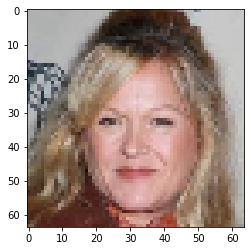

In [ ]:
for i in ds.take(1):
  _ = (i+1.0)/2

plt.imshow(_[0])

#Training Loop

In [33]:
# Define Generator and Discriminator

import tensorflow as tf
from tensorflow.keras import layers

FINAL_DIM = 128
IMAGE_RES = 64
NOISE_DIM = 100

def Generator():
      
  def add_g_layer(x, filters):
    """
    Generator layers are made up of a fractionally-strided convolution 
    ("deconvolution"), BatchNorm, and ReLU activation. 
    """
    x = tf.keras.layers.Conv2DTranspose(filters, kernel_size=(5, 5), 
                                        strides=(2, 2), padding='same', 
                                        activation=None)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    return x

  def output_g_layer(x):
    # Final fractionally-strided convolution ("deconvolution") into image space
    x = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=(5, 5), 
                                        strides=(2, 2), padding='same', 
                                        activation=None)(x)
    x = tf.math.tanh(x)
    return x

  # Define input noise vector shape
  noise_input = tf.keras.layers.Input(shape=(NOISE_DIM))

  # Initial projection into 4x4 feature maps
  x = tf.keras.layers.Dense(4 * 4 * (FINAL_DIM * 8), 
                            activation=None)(noise_input)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Reshape((4, 4, (FINAL_DIM * 8)))(x)

  # Generator fractionally-strided convolutional layers
  x = add_g_layer(x, filters=FINAL_DIM * 4)
  x = add_g_layer(x, filters=FINAL_DIM * 2)
  x = add_g_layer(x, filters=FINAL_DIM)

  # Final convolution (convert feature maps into image)
  x = output_g_layer(x)

  # Model definition
  model = tf.keras.Model(inputs=noise_input, outputs=x, name='DCGAN_Generator')

  print(model.summary())

  return model

  # Test Model

  # model = tf.keras.Sequential()
  # model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
  # model.add(layers.BatchNormalization())
  # model.add(layers.LeakyReLU())

  # model.add(layers.Reshape((8, 8, 256)))
  # assert model.output_shape == (None, 8, 8, 256)  # Note: None is the batch size

  # model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  # assert model.output_shape == (None, 8, 8, 128)
  # model.add(layers.BatchNormalization())
  # model.add(layers.LeakyReLU())

  # model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  # assert model.output_shape == (None, 16, 16, 64)
  # model.add(layers.BatchNormalization())
  # model.add(layers.LeakyReLU())

  # model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  # assert model.output_shape == (None, 32, 32, 32)
  # model.add(layers.BatchNormalization())
  # model.add(layers.LeakyReLU())

  # model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
  # assert model.output_shape == (None, 64, 64, 3)

  # return model


def Discriminator():

  """
  The Discriminator, for the most part, mirrors, the Generator. Key differences
  are 1) LeakyReLU(0.2) instead of ReLU, and 2) Output FC layer(1) with sigmoid
  activation.
  """

  def add_d_layer(x, filters):
    """
    Discriminator layers are made up of a strided convolutional layer 
    (downsampling without pooling), BatchNorm, and LeakyReLU (leak=0.2)
    """
    x = tf.keras.layers.Conv2D(filters, kernel_size=(5, 5), strides=(2, 2), 
                               padding='same', activation=None)(x)
    # x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    # x = tf.keras.layers.Dropout(0.3)(x)
    return x

  def output_d_layer(x):
    """
    Final layer in Discriminator. Single neuron with sigmoid activation for
    classification of image as fake or real. 
    """
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1)(x)
    # x = tf.keras.layers.BatchNormalization()(x)
    x = tf.math.sigmoid(x)
    return x

  """Start: Image of dimensions (64, 64, 3). End: Fake/real classification value 
  ranging [0, 1]"""

  image_input = tf.keras.layers.Input(shape=(IMAGE_RES, IMAGE_RES, 3))

  # Discriminator's strided convolutions
  x = add_d_layer(image_input, filters=FINAL_DIM)
  x = add_d_layer(x, filters=FINAL_DIM * 2)
  x = add_d_layer(x, filters=FINAL_DIM * 4)
  x = add_d_layer(x, filters=FINAL_DIM * 8)

  # Discriminator's output layer
  x = output_d_layer(x)

  model = tf.keras.Model(inputs=image_input, outputs=x, 
                         name='DCGAN_Discriminator')

  print(model.summary())

  return model

  # model = tf.keras.Sequential()
  # model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same',
  #                                   input_shape=[64, 64, 3]))
  # model.add(layers.LeakyReLU())
  # model.add(layers.Dropout(0.3))

  # model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
  # model.add(layers.LeakyReLU())
  # model.add(layers.Dropout(0.3))

  # model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
  # model.add(layers.LeakyReLU())
  # model.add(layers.Dropout(0.3))

  # model.add(layers.Flatten())
  # model.add(layers.Dense(1))

  # return model

g = Generator()
d = Discriminator()


Model: "DCGAN_Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_12 (Dense)            (None, 16384)             1654784   
                                                                 
 batch_normalization_24 (Bat  (None, 16384)            65536     
 chNormalization)                                                
                                                                 
 reshape_6 (Reshape)         (None, 4, 4, 1024)        0         
                                                                 
 conv2d_transpose_24 (Conv2D  (None, 8, 8, 512)        13107712  
 Transpose)                                                      
                                                                 
 batch_normalization_25 (Bat  (None, 8, 8, 512)    

In [34]:
# Test noise input for Generator

def get_noise_samples(n_samples):
  return(np.random.rand(n_samples, 100))

rand_noise_vec = get_noise_samples(1)
rand_noise_vec

array([[0.5427756 , 0.61614957, 0.97272647, 0.16243118, 0.94151775,
        0.28901141, 0.23298667, 0.59004329, 0.41967368, 0.39898609,
        0.48793319, 0.30381857, 0.77791385, 0.88896094, 0.81464646,
        0.79771941, 0.01758832, 0.33639779, 0.99423589, 0.62322692,
        0.39241976, 0.95541897, 0.89368764, 0.70790232, 0.97676365,
        0.65047287, 0.00357849, 0.19935964, 0.15278307, 0.06352398,
        0.05444447, 0.32289195, 0.24008767, 0.1796292 , 0.7856609 ,
        0.55853793, 0.98891237, 0.3336752 , 0.09742045, 0.12899127,
        0.8664981 , 0.02200224, 0.75869782, 0.11980753, 0.45949984,
        0.42505884, 0.02713389, 0.27863934, 0.79859308, 0.99474975,
        0.70377158, 0.82773984, 0.55856182, 0.37531048, 0.035846  ,
        0.24905023, 0.40440618, 0.90987389, 0.42320168, 0.99497988,
        0.95319185, 0.60777426, 0.74300482, 0.34576562, 0.09992851,
        0.38463913, 0.22538147, 0.51341758, 0.60099658, 0.21324466,
        0.11236802, 0.13694814, 0.73922108, 0.90

tf.Tensor(
[[[[-1.01068035e-04 -1.98237813e-05 -9.01273379e-05]
   [-8.46177718e-05  6.72772512e-05  6.61258528e-05]
   [-3.05286114e-04 -7.17580479e-05 -6.74805924e-05]
   ...
   [-1.01231446e-03  3.87391687e-04  6.04737783e-04]
   [ 2.72971811e-05 -1.49035157e-04  1.11530630e-04]
   [-4.54203109e-04 -1.46378356e-04 -2.99204636e-04]]

  [[-3.63067229e-05  5.48449170e-05  6.15343815e-05]
   [-3.64526786e-04 -1.91641680e-04  1.57312636e-04]
   [-8.25356925e-04 -1.70449319e-04  2.06908691e-04]
   ...
   [ 6.25605287e-04 -1.17437507e-03  7.82398740e-04]
   [-1.28016178e-03  3.18098464e-04  8.28479606e-05]
   [-5.32502541e-04  6.58499775e-04  2.68270698e-04]]

  [[-4.01578254e-05  6.38431666e-05  2.00640192e-04]
   [-6.17662387e-04  5.67981449e-04  3.81754624e-04]
   [-1.40863645e-04  8.57923005e-05  6.85684790e-06]
   ...
   [-1.74701773e-03  3.31013143e-04 -6.92564412e-04]
   [-3.00754982e-05  4.57734684e-04 -3.04554618e-04]
   [-3.13528872e-04 -7.11830857e-04 -4.63871431e-04]]

  ...

 

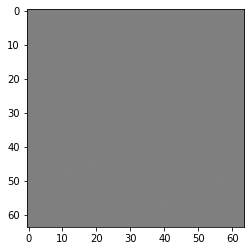

In [35]:
# Feed noise into G and see what we get

test_img = g(rand_noise_vec)

print(test_img)

for img in test_img:
  plt.imshow((img+1)/2)

In [ ]:
# Sampling random images from the dataset

# def get_image_samples(n_samples):
#   return(ds.as_numpy_iterator()[np.random.randint(ds.as_numpy_iterator().shape[0], size=n_samples)])

# plt.imshow((get_image_samples(10)[1]+1)/2)

In [ ]:
# Test D

# print(d(get_image_samples(1)))

In [ ]:
g = Generator()
d = Discriminator()

Model: "DCGAN_Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 2048)              206848    
                                                                 
 batch_normalization_4 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 reshape_1 (Reshape)         (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 8, 8, 64)         204864    
 ranspose)                                                       
                                                                 
 batch_normalization_5 (Batc  (None, 8, 8, 64)     

In [36]:
import time

g = Generator()
d = Discriminator()

# Training loop

EPOCHS = 100
D_STEPS = 1
G_STEPS = 1
BATCH_SIZE = 128

# Model checkpointing paths
g_cp_path = './g/cp'
d_cp_path = './d/cp'

# Set seed
np.random.seed(1)

# Optimizers
# d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
# g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Track current batch iteration
i = 0

# Losses

# cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)  # BUG?
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

# Format from https://www.tensorflow.org/tutorials/generative/dcgan:
def d_loss(real_predictions, fake_predictions):

  # Track Discriminator predictions
  # print('Rlen:', real_predictions.numpy().shape)
  # print('Flen:', fake_predictions.numpy().shape)
  real = real_predictions.numpy()[0][0]
  fake = fake_predictions.numpy()[0][0]
  print('R:', real)
  print('F:', fake)
  if abs(real - fake) < 0.5:
    print('Iterations until bug:', i)

  # Label all real predictions' ground truth as 1, compute b-crossentropy
  real_loss = cross_entropy(tf.ones_like(real_predictions)*0.95, 
                                                   real_predictions)
  # Label all fake predictions' ground truth as 0, compute b-crossentropy
  fake_loss = cross_entropy(tf.zeros_like(fake_predictions),
                                                   fake_predictions)

  loss = real_loss + fake_loss
  print('Loss:', loss.numpy())
  return loss

def print_realandfake_d(data_examples):

  real_pred = d(data_examples)
  fake_pred = d(g(get_noise_samples(1)))  # , Training=True
  print('NEW R:', real_pred.numpy()[0][0])
  print('NEW F:', fake_pred.numpy()[0][0])

def g_loss(d_values):

  # Binary Crossentropy between the Discriminator outputs and 1 (which we'd like 
  # the Discriminator outputs to be)
  loss = cross_entropy(tf.ones_like(d_values),
                                              d_values)
  return loss

# Training step definitions
# Compiled for training

# Toggling @tf.function on will increase performance, but suppress eager 
# execution and prevent logging/displaying to the terminal
# @tf.function
def d_train_step(data_examples):

  with tf.GradientTape() as d_tape:

    # Sample m noise samples
    noise_samples = get_noise_samples(BATCH_SIZE)

    # Get Generator examples from the noise
    g_examples = g(noise_samples)

    # Run Discriminator and get loss
    loss = d_loss(d(data_examples, training=True), d(g_examples, training=True))

  # Get all Discriminator gradients with GradientTape
  d_grad = d_tape.gradient(loss, d.trainable_variables)

  # Apply gradients to model, zipping gradients with corresponding variables
  d_optimizer.apply_gradients(zip(d_grad, d.trainable_variables))

  # Print predictions for real and fake after gradient update
  print_realandfake_d(data_examples)

@tf.function
def g_train_step():

  # All steps of the process must be within for backpropagation to work
  with tf.GradientTape() as g_tape:

    # Sample m noise samples
    noise_samples = get_noise_samples(BATCH_SIZE)

    # Get Generator (fake) examples from the noise
    g_examples = g(noise_samples)

    # Run discriminator on generated samples
    d_values = d(g_examples, training=True)

    # Get loss
    loss = g_loss(d_values)

  # Use GradientTape to get all Generator gradients
  g_grad = g_tape.gradient(loss, g.trainable_variables)

  # Apply gradients
  g_optimizer.apply_gradients(zip(g_grad, g.trainable_variables))

# @tf.function
def train_step():

  time_cp = time.time()
  global i
  i = 0
  for batch in ds:

    # Train Discriminator to distinguish between the two
    for j in range(D_STEPS):
      d_train_step(batch)

    # Train Generator to maximize the probability of tricking the discriminator
    for j in range(G_STEPS):
      g_train_step()    

    i += 1
    update_batches = int(10000/128)
    if i % update_batches == 0:
      
      print('Update', i/update_batches, )
      print('Time elapsed for last ' + str(update_batches) + ' batches:', 
            time.time() - time_cp)
      time_cp = time.time()

      # Display generator image
      for img in g(rand_noise_vec, training=False):
        # print(img.numpy())
        plt.imshow((img.numpy()+1)/2)
        plt.show()
    
  # Save weights
  print('Saving Weights...')
  g.save_weights(g_cp_path)
  d.save_weights(d_cp_path) 

Model: "DCGAN_Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_14 (Dense)            (None, 16384)             1654784   
                                                                 
 batch_normalization_28 (Bat  (None, 16384)            65536     
 chNormalization)                                                
                                                                 
 reshape_7 (Reshape)         (None, 4, 4, 1024)        0         
                                                                 
 conv2d_transpose_28 (Conv2D  (None, 8, 8, 512)        13107712  
 Transpose)                                                      
                                                                 
 batch_normalization_29 (Bat  (None, 8, 8, 512)    

R: 0.49660084
F: 0.5000115
Iterations until bug: 0
Loss: 1.3881326
NEW R: 0.7245558
NEW F: 0.5007971
R: 0.77563006
F: 0.50455713
Iterations until bug: 1
Loss: 1.0166144
NEW R: 0.9916147
NEW F: 0.5091341
R: 0.98763627
F: 0.5578359
Iterations until bug: 2
Loss: 1.0922909
NEW R: 0.95399034
NEW F: 0.51401114
R: 0.9541288
F: 0.57638264
Iterations until bug: 3
Loss: 1.0679687
NEW R: 0.78125936
NEW F: 0.49329883
R: 0.89381003
F: 0.49878168
Iterations until bug: 4
Loss: 0.967998
NEW R: 0.9549731
NEW F: 0.43064287
R: 0.805908
F: 0.4688094
Iterations until bug: 5
Loss: 0.8832357
NEW R: 0.96017253
NEW F: 0.42216736
R: 0.9857978
F: 0.47343484
Loss: 0.8795413
NEW R: 0.97217697
NEW F: 0.438379
R: 0.97693855
F: 0.47266334
Loss: 0.87636393
NEW R: 0.95181257
NEW F: 0.4521854
R: 0.9968009
F: 0.46395218
Loss: 0.8493495
NEW R: 0.9966529
NEW F: 0.44211936
R: 0.9795058
F: 0.45184398
Loss: 0.8237554
NEW R: 0.96958256
NEW F: 0.41696966
R: 0.9045232
F: 0.47066343
Iterations until bug: 10
Loss: 0.8394433
NEW R:

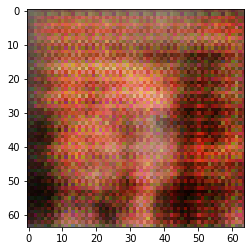

R: 0.6940936
F: 0.1660776
Loss: 0.52006674
NEW R: 0.49166632
NEW F: 0.027787056
R: 0.99645114
F: 0.11186611
Loss: 0.5708851
NEW R: 0.99488974
NEW F: 0.028356086
R: 0.99872607
F: 0.12590967
Loss: 0.72227025
NEW R: 0.99820435
NEW F: 0.029775938
R: 0.9898505
F: 0.17637636
Loss: 0.6765778
NEW R: 0.99068063
NEW F: 0.028659068
R: 0.04651318
F: 0.14915313
Iterations until bug: 629
Loss: 0.7045388
NEW R: 0.05633549
NEW F: 0.023215678
R: 0.9712346
F: 0.23392755
Loss: 0.7682854
NEW R: 0.94675946
NEW F: 0.017745381
R: 0.98934305
F: 0.27246284
Loss: 0.9476963
NEW R: 0.9446717
NEW F: 0.0045281867
R: 0.004637389
F: 0.114143595
Iterations until bug: 632
Loss: 1.1070509
NEW R: 0.013121641
NEW F: 0.01912752
R: 0.9801656
F: 0.5980952
Iterations until bug: 633
Loss: 1.6442652
NEW R: 0.9891573
NEW F: 8.884221e-05
R: 0.034735136
F: 0.0032910754
Iterations until bug: 634
Loss: 1.55615
NEW R: 0.28236338
NEW F: 0.0024677352
R: 0.49182728
F: 0.56182516
Iterations until bug: 635
Loss: 1.803519
NEW R: 0.55449706

In [ ]:
# Train

def train(EPOCHS):

  for i in range(EPOCHS):

    train_step()
    print("EPOCH " + str(i))

train(50)

tf.Tensor(
[[[[ 1.12502382e-03 -2.04627169e-03 -2.49071489e-03]
   [ 2.27413070e-03 -1.77720014e-03 -2.09537288e-03]
   [ 9.13575175e-04 -3.05886636e-03 -2.07877089e-03]
   ...
   [ 2.38127494e-03 -2.35313992e-03 -2.37391610e-03]
   [ 5.57251100e-04 -2.89784861e-03 -1.45730085e-03]
   [ 1.39938924e-03 -2.09562248e-03 -3.43269808e-03]]

  [[ 2.71131610e-03 -4.18751093e-04 -2.55604438e-03]
   [ 3.08001391e-03 -3.89338424e-03 -3.56943742e-03]
   [ 3.32979369e-03 -7.12959911e-04 -9.36175813e-04]
   ...
   [ 5.23495395e-03 -7.28471903e-03 -4.16375324e-03]
   [ 3.59921902e-03 -1.49556925e-03 -1.42948213e-03]
   [ 4.17355960e-03 -5.73009625e-03 -3.10708187e-03]]

  [[ 1.08557683e-03 -2.79204221e-03 -2.95645883e-03]
   [ 1.22361118e-03 -1.36034528e-03 -5.57720254e-04]
   [ 3.87150445e-04 -4.04730439e-03 -3.04922066e-03]
   ...
   [ 3.86425992e-04 -1.72130635e-03 -1.13695301e-03]
   [ 1.18085765e-04 -4.71739471e-03 -3.85239278e-03]
   [ 1.30999659e-03 -3.83028225e-03 -4.70717001e-04]]

  ...

 

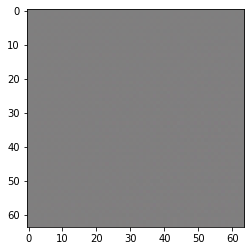

In [ ]:
test_img = g(rand_noise_vec)

print(test_img)

for img in test_img:
  plt.imshow((img + 1)/2)

In [ ]:
test_g_sample = g(get_noise_samples(1))
test_real_sample = get_image_samples(1)

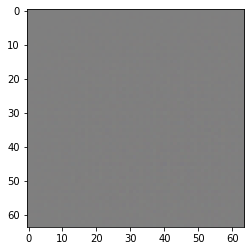

In [ ]:
plt.imshow((test_g_sample[0]+1)/2)

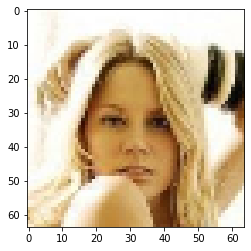

In [ ]:
plt.imshow((test_real_sample[0]+1)/2)

In [ ]:
# Discriminator test

# Note: Since the generator is trained after the discriminator during the sequence, 

fake = 0
real = 0

for i in range(200):
  test_g_sample = g(get_noise_samples(1))
  test_real_sample = get_image_samples(1)
  fake+=d(test_g_sample)
  real+=d(test_real_sample)

print(fake/200.0)
print(real/200.0)

# print(d(test_g_sample))

# print(d(test_real_sample))

# print(d(g(get_noise_samples(1))))

# print(d(get_image_samples(1)))

tf.Tensor([[5.6096707e-07]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.]], shape=(1, 1), dtype=float32)


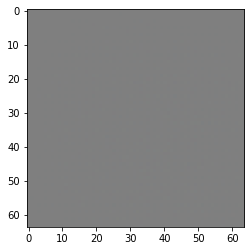

In [ ]:
plt.imshow((g(get_noise_samples(1))[0]+1)/2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


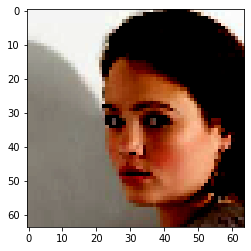

In [ ]:
plt.imshow(data_examples[0])

In [ ]:
# Prepare data

real_ds = tf.keras.utils.image_dataset_from_directory('/content/CelebA/img_align_celeba/', 
                                                      validation_split=0.1, 
                                                      subset='training', seed=1)


Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: ignored

In [ ]:
# Load dataset

import tensorflow_datasets as tfds

ds = tfds.load('celeb_a', shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

KeyError: ignored